# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [109]:
import numpy as np
np.random.seed(42) # For reproducibility

def initialize_network(input_size, hidden_layers, output_size):

    
    # Your code should contain the weights and biases
    # provide your code
    # Intialize variables
    num_nodes_previous = input_size # number of nodes in the previous layer
    network = []
    
    # Randomly initialize the weights and biases associated with each layer
    for layer in range(len(hidden_layers) + 1):
        # Setup number of nodes
        if layer == len(hidden_layers): num_nodes = output_size # Output Layer
        else: num_nodes = hidden_layers[layer] # Hidden Layers
        # Layer weights and biases initialization
        weights = []
        biases = []
        # Initialize weights and bias for each node
        for node in range(num_nodes): weights.append(np.random.uniform(low=-0.2, high=0.2, size=num_nodes_previous))
        # Put the dictionary together and append it to the network
        network.append({
            'weights': np.array(weights),
            'biases': np.array([(np.zeros(num_nodes))])
        })
        # Update the number of nodes in the previous layer
        num_nodes_previous = num_nodes
    # Send back the formatted network as a list of dictionaries
    return network # return the network

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Joshua Summers + Initialized Network:", network)

# Initialized Network: [{'weights': array([[ 0.04967142, -0.01382643,  0.06476885,  0.15230299],
#        [-0.02341534, -0.0234137 ,  0.15792128,  0.07674347],
#        [-0.04694744,  0.054256  , -0.04634177, -0.04657298]]), 'biases': array([[0., 0., 0., 0.]])}, {'weights': array([[ 0.02419623, -0.19132802, -0.17249178],
#        [-0.05622875, -0.10128311,  0.03142473],
#        [-0.09080241, -0.14123037,  0.14656488],
#        [-0.02257763,  0.00675282, -0.14247482]]), 'biases': array([[0., 0., 0.]])}, {'weights': array([[-0.05443827],
#        [ 0.01109226],
#        [-0.11509936]]), 'biases': array([[0.]])}]

Joshua Summers + Initialized Network: [{'weights': array([[-0.05018395,  0.18028572,  0.09279758],
       [ 0.03946339, -0.13759254, -0.13760219],
       [-0.17676656,  0.14647046,  0.040446  ],
       [ 0.08322903, -0.1917662 ,  0.18796394]]), 'biases': array([[0., 0., 0., 0.]])}, {'weights': array([[ 0.13297706, -0.11506436, -0.12727001, -0.1266382 ],
       [-0.0783031 ,  0.00990257, -0.02722199, -0.08350834],
       [ 0.04474116, -0.14420246, -0.08314214, -0.05345526]]), 'biases': array([[0., 0., 0.]])}, {'weights': array([[-0.01757201,  0.11407038, -0.12013049]]), 'biases': array([[0.]])}]


## Step 2: Compute Weighted Sum

In [110]:
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calculate the compute weighted with linear 
    # provide your code
    return np.sum(inputs * weights) + biases
    
# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network[0]  # First layer
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])
print("Joshua Summers - Weighted Sum:", Z)

Joshua Summers - Weighted Sum: [[-0.03428902 -0.03428902 -0.03428902 -0.03428902]]


## Step 3: Compute Node Activation

In [111]:
def sigmoid(Z):
#     provide your code
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    # provide your code
    return A * (1 - A)

# Compute activation for the weighted sum
A = sigmoid(Z)
print("Joshua Summers - Activation:", A)

Joshua Summers - Activation: [[0.49142858 0.49142858 0.49142858 0.49142858]]


## Step 4: Perform Forward Propagation

In [112]:
def forward_propagation(inputs, network):
    # provide your code
    activations = [inputs]  # Start with the input layer
    for layer in network:
        z = []
        a = []
        for node in range(len(layer["weights"])):
            z_value = np.dot(activations[-1], layer["weights"][node]) + layer['biases'][0][node]
            z.append(z_value)
            a.append(sigmoid(z_value))
        activations.append(np.array([np.array(a).flatten()]))
    return activations

# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Joshua Summers - Final Output:", activations[-1])

# [array([[0.5, 0.2, 0.1]]), array([[0.5038644 , 0.49845742, 0.51482928, 0.52169709]]), array([[0.48141795, 0.44619037, 0.48247683]]), array([[0.48081166]])]
# Final Output: [[0.48081166]]

[array([[0.5, 0.2, 0.1]]), array([[0.50506106, 0.49461345, 0.48624233, 0.50551419]]), array([[0.4711191 , 0.47748997, 0.47098835]]), array([[0.49740225]])]
Joshua Summers - Final Output: [[0.49740225]]


## Step 5: Backpropagation

In [113]:
learning_rate = 0.6 # Learning rate

def backpropagation(network, activations, y_true):
    # provide your code
    # Initialize variables
    gradients = []  # Store gradients for each layer
    length = len(network)  # Number of layers

    # Step 1: Compute the delta for the output layer
    delta = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])

    # Step 2: Backpropagate through the layers
    for layer_idx in reversed(range(length)):
        layer = network[layer_idx] # Get the current layer

        # Compute gradients for weights and biases
        a_prev = activations[layer_idx]  # Activation of previous layer
        dW = np.dot(a_prev.T, delta)  # Compute gradient for weights
        db = np.sum(delta, axis=0, keepdims=True)  # Compute gradient for biases

        # Store gradients for the current layer
        gradients.insert(0, {'dW': dW, 'db': db})  # Insert at beginning to match network order

        # Compute the delta for the previous layer (hidden layers)
        if layer_idx > 0:
            weights = layer['weights']  # Current layer weights
            # Compute the new delta
            delta = np.dot(delta, weights) * sigmoid_derivative(activations[layer_idx])
            
    # Return the gradients
    return gradients

# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Joshua Summers - Gradients:", gradients)

# Gradients: [{'dW': array([[-6.64848659e-05,  6.74836392e-06,  5.44712791e-05,
#         -7.14726125e-05],
#        [-2.65939464e-05,  2.69934557e-06,  2.17885116e-05,
#         -2.85890450e-05],
#        [-1.32969732e-05,  1.34967278e-06,  1.08942558e-05,
#         -1.42945225e-05]]), 'db': array([[-1.32969732e-04,  1.34967278e-05,  1.08942558e-04,
#         -1.42945225e-04]])}, {'dW': array([[ 0.00088753, -0.00017899,  0.0018768 ],
#        [ 0.00087801, -0.00017707,  0.00185666],
#        [ 0.00090684, -0.00018289,  0.00191764],
#        [ 0.00091894, -0.00018533,  0.00194322]]), 'db': array([[ 0.00176144, -0.00035524,  0.00372481]])}, {'dW': array([[-0.06239462],
#        [-0.05782892],
#        [-0.06253186]]), 'db': array([[-0.12960592]])}]

Joshua Summers - Gradients: [{'dW': array([[ 6.51703274e-05, -8.01185450e-05, -3.56418583e-05,
         3.48889239e-06],
       [ 2.60681309e-05, -3.20474180e-05, -1.42567433e-05,
         1.39555696e-06],
       [ 1.30340655e-05, -1.60237090e-05, -7.12837166e-06,
         6.97778478e-07]]), 'db': array([[ 1.30340655e-04, -1.60237090e-04, -7.12837166e-05,
         6.97778478e-06]])}, {'dW': array([[ 0.00027785, -0.00180603,  0.00189942],
       [ 0.0002721 , -0.00176867,  0.00186013],
       [ 0.00026749, -0.00173873,  0.00182865],
       [ 0.00027809, -0.00180765,  0.00190113]]), 'db': array([[ 0.00055012, -0.00357586,  0.00376078]])}, {'dW': array([[-0.05919425],
       [-0.05999473],
       [-0.05917782]]), 'db': array([[-0.12564605]])}]


## Step 6: Update Weights

In [114]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
    # Iterate through the network
    for layer_idx, layer in enumerate(network):
        # Get the length of weights
        length = len(layer['weights'])
        gradient = gradients[layer_idx]
        # Iterate through the weights and update weights and biases on the same index
        for index, weight in enumerate(network[layer_idx]['weights']):
            dW = gradient['dW'][layer_idx][index]
            db = gradient['db'][0][index]
            network[layer_idx]['weights'][index] -= learning_rate * dW
            network[layer_idx]['biases'][0] -= learning_rate * db
        

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("Joshua Summers - Updated Network:", network)

Joshua Summers - Updated Network: [{'weights': array([[-0.05019047,  0.18027921,  0.09279106],
       [ 0.03947141, -0.13758453, -0.13759418],
       [-0.17676299,  0.14647402,  0.04044957],
       [ 0.08322868, -0.19176655,  0.18796359]]), 'biases': array([[9.42023671e-06, 9.42023671e-06, 9.42023671e-06, 9.42023671e-06]])}, {'weights': array([[ 0.13294985, -0.11509157, -0.12729722, -0.12666541],
       [-0.07812624,  0.01007944, -0.02704513, -0.08333148],
       [ 0.04455514, -0.14438847, -0.08332815, -0.05364128]]), 'biases': array([[-7.35036792e-05, -7.35036792e-05, -7.35036792e-05]])}, {'weights': array([[-0.01165422,  0.11998817, -0.1142127 ]]), 'biases': array([[0.0125646]])}]


## Step 7: Visualizing Loss Changes

In [115]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    # provide your code
    return np.mean((y_true - y_pred) ** 2)


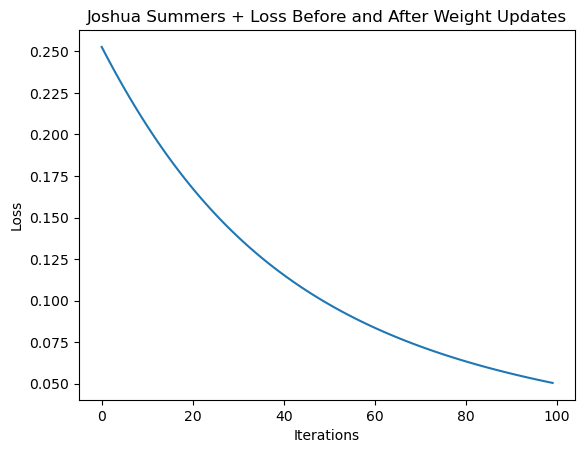

In [108]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    # gradients = backpropagation function
    # update_weights

    # Step 1: Perform forward propagation to compute the network's predictions
    activations = forward_propagation(inputs, network)  # Forward pass
    
    # Step 2: Compute the loss (error) between the true labels and the predicted output
    loss = compute_loss(y_true, activations[-1])  # Loss for the current iteration
    losses.append(loss)  # Append the computed loss to the list
    
    # Step 3.1: Perform backpropagation to compute gradients
    gradients = backpropagation(network, activations, y_true)

    # Step 3.2: Update the weights with a learning rate of 0.1
    update_weights(network, gradients, learning_rate=0.1)

    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Joshua Summers + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code